In [1]:
from __future__ import print_function
import sys
sys.path.append('../build/')
%pylab inline
np.set_printoptions(precision=6, suppress=True)
import versor as vsr
import motor_jacobian

Populating the interactive namespace from numpy and matplotlib


In [2]:
m = vsr.Vec(1,2,3).trs() * (vsr.Biv(1,2,3).unit() * (-pi/6)).exp(); print(m)
# m = vsr.Mot(0,2,0,0,0,0,0,0)
b = vsr.Dll(0,0,0,0,0,0)

Mot: [ 0.87 0.13 0.27 0.4 0.1 -0.33 -1.8 -0.13 ]


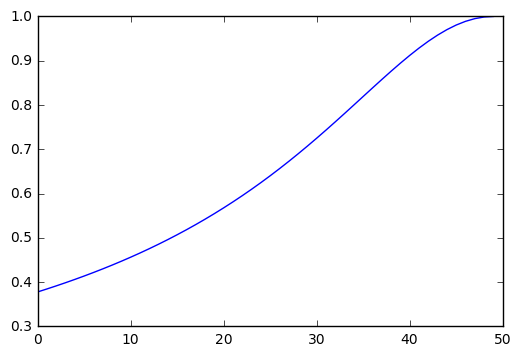

In [3]:
t = 0
plot([1.0 / (sqrt((t + h)**2 * 6 + 1.0)) for h in np.linspace(1,0)])

In [4]:
pm = motor_jacobian.jacobian_polar(m); pm

array([[-0.133631, -0.267261, -0.400892,  0.      ,  0.      ,  0.      ],
       [ 0.866025, -0.400892,  0.267261,  0.      ,  0.      ,  0.      ],
       [ 0.400892,  0.866025, -0.133631,  0.      ,  0.      ,  0.      ],
       [-0.267261,  0.133631,  0.866025,  0.      ,  0.      ,  0.      ],
       [-0.331503, -1.833561,  0.133631,  0.866025, -0.133631, -0.267261],
       [-0.10151 , -0.133631, -1.833561,  0.133631,  0.866025, -0.400892],
       [ 0.133631, -0.10151 ,  0.331503,  0.267261,  0.400892,  0.866025],
       [-1.833561,  0.331503,  0.10151 ,  0.400892, -0.267261,  0.133631]])

In [5]:
em = motor_jacobian.jacobian_exp(m); em

array([[-0.133631, -0.267261, -0.400892,  0.      ,  0.      ,  0.      ],
       [ 0.866025, -0.400892,  0.267261,  0.      ,  0.      ,  0.      ],
       [ 0.400892,  0.866025, -0.133631,  0.      ,  0.      ,  0.      ],
       [-0.267261,  0.133631,  0.866025,  0.      ,  0.      ,  0.      ],
       [-0.331503, -1.833561,  0.133631,  0.866025, -0.133631, -0.267261],
       [-0.10151 , -0.133631, -1.833561,  0.133631,  0.866025, -0.400892],
       [ 0.133631, -0.10151 ,  0.331503,  0.267261,  0.400892,  0.866025],
       [-1.833561,  0.331503,  0.10151 ,  0.400892, -0.267261,  0.133631]])

In [6]:
cm = motor_jacobian.jacobian_cayley(m); cm

array([[-0.267261, -0.534522, -0.801784,  0.      ,  0.      ,  0.      ],
       [ 1.732051, -0.801784,  0.534522,  0.      ,  0.      ,  0.      ],
       [ 0.801784,  1.732051, -0.267261,  0.      ,  0.      ,  0.      ],
       [-0.534522,  0.267261,  1.732051,  0.      ,  0.      ,  0.      ],
       [-0.663006, -3.667121,  0.267261,  1.732051, -0.267261, -0.534522],
       [-0.20302 , -0.267261, -3.667121,  0.267261,  1.732051, -0.801784],
       [ 0.267261, -0.20302 ,  0.663006,  0.534522,  0.801784,  1.732051],
       [-3.667121,  0.663006,  0.20302 ,  0.801784, -0.534522,  0.267261]])

In [11]:
om = motor_jacobian.jacobian_oexp(m); om

array([[-0.133631, -0.267261, -0.400892,  0.      ,  0.      ,  0.      ],
       [ 0.866025, -0.400892,  0.267261,  0.      ,  0.      ,  0.      ],
       [ 0.400892,  0.866025, -0.133631,  0.      ,  0.      ,  0.      ],
       [-0.267261,  0.133631,  0.866025,  0.      ,  0.      ,  0.      ],
       [-0.331503, -1.833561,  0.133631,  0.866025, -0.133631, -0.267261],
       [-0.10151 , -0.133631, -1.833561,  0.133631,  0.866025, -0.400892],
       [ 0.133631, -0.10151 ,  0.331503,  0.267261,  0.400892,  0.866025],
       [-1.833561,  0.331503,  0.10151 ,  0.400892, -0.267261,  0.133631]])

In [12]:
np.allclose(pm,em)

False

In [13]:
np.allclose(pm,cm)

True

In [14]:
np.allclose(pm,om)

True

In [13]:
m = vsr.Mot(1,2,3,4,5,6,7,8)
b1 = vsr.Dll(1,0,0,0,0,0)
b2 = vsr.Dll(0,1,0,0,0,0)
b3 = vsr.Dll(0,0,1,0,0,0)
b4 = vsr.Dll(0,0,0,1,0,0)
b5 = vsr.Dll(0,0,0,0,1,0)
b6 = vsr.Dll(0,0,0,0,0,1)
np.array([
        np.array(b1*m),
        np.array(b2*m),
        np.array(b3*m),
        np.array(b4*m),
        np.array(b5*m),
        np.array(b6*m)]).T

array([[-2., -3., -4.,  0.,  0.,  0.],
       [ 1., -4.,  3.,  0.,  0.,  0.],
       [ 4.,  1., -2.,  0.,  0.,  0.],
       [-3.,  2.,  1.,  0.,  0.,  0.],
       [ 6.,  7., -8.,  1., -2., -3.],
       [-5.,  8.,  7.,  2.,  1., -4.],
       [-8., -5., -6.,  3.,  4.,  1.],
       [ 7., -6.,  5.,  4., -3.,  2.]])

In [14]:
np.array([
        np.array((m + b1*m).retract()),
        np.array((m + b2*m).retract()),
        np.array((m + b3*m).retract()),
        np.array((m + b4*m).retract()),
        np.array((m + b5*m).retract()),
        np.array((m + b6*m).retract())]).T

array([[-0.129099, -0.258199, -0.387298,  0.182574,  0.182574,  0.182574],
       [ 0.387298, -0.258199,  0.645497,  0.365148,  0.365148,  0.365148],
       [ 0.903696,  0.516398,  0.129099,  0.547723,  0.547723,  0.547723],
       [ 0.129099,  0.774597,  0.645497,  0.730297,  0.730297,  0.730297],
       [ 1.385667,  1.342634, -0.559431,  0.900699,  0.352977,  0.170403],
       [ 0.370085,  1.945098,  1.712719,  1.606653,  1.424079,  0.511208],
       [-0.232379,  0.327052, -0.043033,  1.728369,  1.910943,  1.363221],
       [ 1.902065,  0.189346,  1.575013,  2.239577,  0.961557,  1.874428]])

In [11]:
p = vsr.Vec(1,0,0).null()
m = vsr.Vec(1,2,3).trs() * vsr.Biv(pi/6,0,0).exp()
b = vsr.Dll(1,0,0,0,0,0)

In [12]:
p.spin(m).comm(b) - b.comm(p.spin(m))

Dlp: [ -5.732 3 0 0 ]

b.comm(p.spin(m)) - p.spin(m).comm(b)

In [13]:
b.comm(p.spin(m))

Pnt: [ 2.866 -1.5 0 0 0 ]

In [14]:
m.rev() * b.rev()

Mot: [ 0.5 -0.87 0 0 0.62 -0.93 0.75 -1.3 ]

In [15]:
b.rev() * m.rev()

Mot: [ 0.5 -0.87 0 0 -0.62 0.93 0.75 -1.3 ]

In [16]:
vsr.Dll(-0.5,0,0,0,0,0) * m

Mot: [ -0.25 -0.43 0 0 0.31 -0.47 0.37 0.65 ]

In [17]:
vsr.Dll(-1,-2,-3,-4,-5,-6).exp() 

Mot: [ -0.83 0.15 0.3 0.45 1.8 -0.016 1.3 -1.2 ]

In [18]:
vsr.Dll(1,2,3,4,5,6).exp().rev() 

Mot: [ -0.83 0.15 0.3 0.45 1.8 -0.016 1.3 -1.2 ]

In [19]:
vsr.Dll(1,2,3,4,5,6).rev() * m.rev()

Mot: [ 0.5 -0.87 -0.23 -3.6 -1.9 -11 -0.73 -5.9 ]

In [20]:
m.rev() * vsr.Dll(0,0,0,0,0,0)

Mot: [ 0 0 0 0 0 0 0 0 ]

In [21]:
m2 = vsr.Vec(1,2,3).trs() * vsr.Biv(pi/6,0,0).exp()
l2 = m2.log()

In [22]:
m.rev() * l2.rev()

Mot: [ -0.26 0.45 0 0 0.85 0.56 0.91 1.4 ]

In [23]:
l2.rev() * m.rev()

Mot: [ -0.26 0.45 0 0 0.85 0.56 0.91 1.4 ]

In [24]:
p.spin(m).comm(l2)

Pnt: [ 0.5236 -1.43 -1.5 0 -7.814 ]

In [25]:
l2.comm(p.spin(m))

Pnt: [ -0.5236 1.43 1.5 0 7.814 ]

In [26]:
B = vsr.EGA(vsr.Biv(1,2,3))
A = vsr.EGA(vsr.Vec(1,2,3))
R = vsr.EGA(vsr.Biv(pi/6,0,0).exp())

In [27]:
B * R * A * R.rev() + R * A * (B * R).rev()

EGA: [ 0 16 20 -6.3 0 0 0 0 ]

In [28]:
B * R * A * R.rev() + R * A * R.rev() * B.rev()

EGA: [ 0 16 20 -6.3 0 0 0 0 ]

In [29]:
B * R * A * R.rev() - R * A * R.rev() * B

EGA: [ 0 16 20 -6.3 0 0 0 0 ]

In [30]:
B = vsr.CGA(vsr.Dll(1,2,3,4,5,6))
M = vsr.CGA(vsr.Vec(1,2,3).trs() * vsr.Biv(pi/6,0,0).exp())
A = vsr.CGA(vsr.Vec(1,2,3).null())

In [31]:
B * M * A * M.rev() - M * A * (B * M).rev()

CGA: [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -4.9 2 4 6 18 51 1.4e+02 -8 -10 -12 0 0 0 0 0 -3.3e-16 ]

In [32]:
B * M * A * M.rev() + M * A * M.rev() * B.rev()

CGA: [ 0 24 26 -34 0 -1.1e+02 0 0 0 0 0 0 0 0 0 0 -1.8e-15 0 0 0 1.8e-15 3.6e-15 0 0 0 0 0 0 0 0 0 1.1e-16 ]

In [33]:
B * M * A * M.rev() - M * A * M.rev() * B

CGA: [ 0 24 26 -34 0 -1.1e+02 0 0 0 0 0 0 0 0 0 0 -1.8e-15 0 0 0 1.8e-15 3.6e-15 0 0 0 0 0 0 0 0 0 1.1e-16 ]

In [34]:
2. * B.comm(A.spin(M))

CGA: [ 0 24 26 -34 0 -1.1e+02 0 0 0 0 0 0 0 0 0 0 -4.4e-16 0 0 0 7.1e-15 -3.6e-15 0 0 0 0 0 0 0 0 0 0 ]

In [35]:
B = vsr.Biv(-1.0, 0.0, 0.0).unit() * pi/6.
R = B.exp()
print(R)

TypeError: unsupported operand type(s) for /: 'versor_pybind11.Biv' and 'float'

In [ ]:
f, J_f = motor_jacobian.diff_rotor_cost(vsr.Rot(1.0,2.0,3.0,4.0), 
                                        vsr.Vec(0.0,1.0,0.0), 
                                        vsr.Vec(1.0,1.0,3.0))
f = vsr.Vec(*f)
print(f)
print(J_f)

In [ ]:
J_f2 = motor_jacobian.analytic_diff_rotor_cost(vsr.Rot(1.0,2.0,3.0,4.0), 
                                        vsr.Vec(0.0,1.0,0.0), 
                                        vsr.Vec(1.0,1.0,3.0))
print(J_f2 * -1.)

In [ ]:
B = vsr.Biv(1.0, 1.0, 1.0).unit() * pi/6.
R = B.exp()
a = vsr.Vec(1.0, 1.0, 1.0)
b = vsr.Vec(0.0, 1.0, 3)
print(R)
f, J_f = motor_jacobian.diff_rotor_cost(R, a, b)
print(J_f)

In [ ]:
J_f3 = 2.* np.array([np.array((vsr.Vec(1,0,0) * a) * R.rev()),
                     np.array((vsr.Vec(0,1,0) * a) * R.rev()),
                     np.array((vsr.Vec(0,0,1) * a) * R.rev())]).copy()
print(J_f3)

In [ ]:
a = vsr.Biv(*np.array(  (vsr.Vec(1,0,0) * a) * R.rev())[1:]).duale().unit()

In [ ]:
b = vsr.Biv(*np.array(J_f[0,1:])).duale().unit()

In [ ]:
a <= b

In [ ]:
(vsr.Vec(0,1,0) * a)

In [ ]:
(vsr.Dll(0,0,1,0,0,0).rev() * vsr.Dll(vsr.Vec(1,2,3).null(), vsr.Vec(1,0,0)))[0]

In [ ]:
# p1 = vsr.Vec(1,0,1).null()
p2 = vsr.Vec(0,1,1).null()
p3 = vsr.Vec(1,1,1).null()
p4 = vsr.Vec(0,0,1.5).null()
cir = vsr.Cir(p2, p3, p4)


In [ ]:
(vsr.Vec(1,0,0) * a)

In [ ]:
(vsr.Vec(1,0,0) * a) * R.rev() * 2.

In [ ]:
np.allclose(J_f, J_f3)

In [ ]:
J_f - J_f3

In [ ]:
J_f3

In [ ]:
(vsr.Vec(1,0,0) * a) * vsr.Rot(1.0,2.0,3.0,4.0).rev()

In [ ]:
print(R)
def J_x(x):
    return np.array([[-x[1], -x[2], -x[3]],
                     [x[0], -x[3],  x[2]],
                     [ x[3],   x[0], -x[1]],
                     [-x[2],  x[1],   x[0]]])
print(J_x(R))

In [ ]:
J_l = motor_jacobian.rotor_local_parameterization(R)
print(J_l)

In [ ]:
np.array([np.array(vsr.Rot(1,0,0,0) * R),
          np.array(vsr.Rot(0.0,1.0,0.0,0.0) * R),
          np.array(vsr.Rot(0.0,0.0,1.0,0.0) * R),
          np.array(vsr.Rot(0.0,0.0,0.0,1.0) * R)
         ])

In [ ]:
np.array([np.array(vsr.Rot(0.0,1.0,0.0,0.0) * R),
          np.array(vsr.Rot(0.0,0.0,1.0,0.0) * R),
          np.array(vsr.Rot(0.0,0.0,0.0,1.0) * R),
         ])
print(R.log())
print(R * vsr.valkenburg2(vsr.Biv(-2,0,0), R.log()*2.))
print(R * vsr.valkenburg2(vsr.Biv(0,-2,0), R.log()*2.))
print(R * vsr.valkenburg2(vsr.Biv(0,0,-2), R.log()*2.))

In [ ]:
(B * B).inv()

In [ ]:
vsr.Biv(1,0,0) * R.log()

In [ ]:
print(J_f3)
print(J_x(R))
np.dot(-J_f3.copy(), J_x(R).copy())

In [ ]:
np.dot(J_f, J_l)

In [ ]:
a = vsr.Vec(1.,2.,3.)
print(a)
B = vsr.Biv(1.0, 2.0, 3.0).unit() * pi/6.
print(B)
R = B.exp()
print(R)
D = vsr.Biv(1.0,0.0,0.0)
D * B * B.exp()

In [ ]:
np.array([vsr.diff_rotor(R,vsr.Biv(1.0,0.0,0.0),vsr.Vec(1.0,0.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(1.0,0.0,0.0),vsr.Vec(0.0,1.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(1.0,0.0,0.0),vsr.Vec(0.0,0.0,1.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,1.0,0.0),vsr.Vec(1.0,0.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,1.0,0.0),vsr.Vec(0.0,1.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,1.0,0.0),vsr.Vec(0.0,0.0,1.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,0.0,1.0),vsr.Vec(1.0,0.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,0.0,1.0),vsr.Vec(0.0,1.0,0.0)),
          vsr.diff_rotor(R,vsr.Biv(0.0,0.0,1.0),vsr.Vec(0.0,0.0,1.0))]).reshape(3,3)

In [ ]:
print(R)
vsr.Biv(1.0,0.0,0.0) * vsr.Rot(0, 12, 13, 23)

In [ ]:
j = np.zeros((4,3))
for i in range(3):
    biv = vsr.Biv(0.0, 0.0, 0.0)
    biv[i] = 1.0 
    j[:,i] = biv * vsr.Rot(1, 12, 13, 23)
print(j)

In [ ]:
vsr.Biv(1,0,0) * R

In [ ]:
R.log().exp()

In [ ]:
vsr.Rot(1,0,0,0)* R.log() * R * 2.

In [ ]:
 def jacrot(a, rot):
    j = np.zeros((3,3))
    for i in range(3):
        biv = vsr.Biv(0.0, 0.0, 0.0)
        biv[i] = 1.0
        j[:,i] = -np.array(biv.comm(a.spin(rot)))
    return j

In [ ]:
B = vsr.Biv(1.0, 0.0, 0.0).unit() * pi/6.
R = B.exp()
print(R)
a = vsr.Vec(0.0, 1.0, 0.0)
b = vsr.Vec(1.0, 1.0, 1.0)

In [ ]:
jacrot(a, R)

# Compute Jacobian

In [ ]:
mot = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
print(mot.log())

In [ ]:
p = vsr.Vec(0,0,0).null()
p.comm(vsr.Lin(vsr.Vec(0,1,0).null(), vsr.Vec(-1,0,0)).dual())

In [ ]:
mot = vsr.Mot(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)

In [ ]:
dll = vsr.Dll(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mot0 = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [ ]:
mot.comm(dll)

In [ ]:
mot.acomm(dll)

In [ ]:
mot.acomm(mot0)

In [ ]:
mot.acomm(dll) - mot.comm(dll) 

In [ ]:
mot = vsr.Mot(1.0, -2.0, -3.0, -4.0, 5.0, 6.0, 7.0, 8.0)

In [ ]:
j = np.zeros((8,6))
idxs = np.array([-1,-1,-1,1,1,1])
for i in range(6):
    dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    dll[i] = idxs[i]
#     j[:,i] = np.array(mot.acomm(dll)) - np.array(mot.comm(dll)) 
    j[:,i] = dll * mot 
print(j)

In [ ]:
a = vsr.Dll(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
b = mot.log()
print(a)
print(b)
mot * vsr.valkenburg(a, mot.log())

In [ ]:
b * a

In [ ]:
a + mot * 

In [ ]:
np.array(b * a)

In [ ]:
vsr.Dll(*np.array(b * a)[1:7])

In [ ]:
vsr.Mot(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) + ((-b * 2.)
                                                   + vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
                                                   + (b.exp() * -1.) * (b_inv * b_inv)) * vsr.Dll(*np.array(b * a)[1:7])

In [ ]:
j = np.zeros((8,6))
for i in range(6):
    dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    dll[i] = 1.0
#     print(dll)
    j[:,i] = np.array(dll.comm(mot)) + np.array(dll.acomm(mot)) 
print(j)

In [ ]:
dll = vsr.Dll(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
dll * mot

In [ ]:
dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
jac_exp = motor_jacobian.jacobian_exp(mot, dll)
print(jac_exp)
print(jac_exp.shape)

In [ ]:
np.allclose(j, jac_exp)

In [ ]:

jac_polar = motor_jacobian.jacobian_polar(mot0, mot0)
print(jac_polar)
print(jac_polar.shape)

In [ ]:
dll.exp()

In [ ]:
mot = vsr.Lin(vsr.Vec(0,1,0).null(), vsr.Vec(-1,0,0)).dual().exp()
print(mot)
p = vsr.Vec(0,0,0).null()

In [ ]:
print(motor_jacobian.diff_point(mot,p))

In [ ]:
p = vsr.Vec(0,0,0).null()
p.comm(vsr.Lin(vsr.Vec(0,1,0).null(), vsr.Vec(-1,0,0)).dual())

In [ ]:
p.comm(mot)

In [ ]:
p.acomm(mot)

In [ ]:
a = vsr.Vec(1,0,0).null()
b = a.spin(vsr.Rot(vsr.Biv(1,0,0) * pi/4))
print(a)
print(b)
m = vsr.Vec(1,2,3).trs() * vsr.Rot(vsr.Biv(1,2,3).unit() * pi/6)
print(m)
c = a.spin(m)
print(c)
points_a = [a]
points_b = [b]

In [ ]:
c.vec() - b.vec()

In [ ]:
# m = vsr.Mot(1,0,0,0,0,0,0,0)
dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
m = vsr.Dll(*np.random.rand(6)).exp()
jac_exp = motor_jacobian.jacobian_exp(m, dll)
print(jac_exp)
print(a)
print(b)
print(m)
jac_s = motor_jacobian.diff_cost(m, a, b)
print(jac_s)
np.dot(jac_s, jac_exp)

In [ ]:
vsr.Dll(0,0,1,0,0,0).comm(a.spin(m))

In [ ]:
def jac2(arg):
    j = np.zeros((5,6))
    for i in range(6):
        dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
        dll[i] = 1.0
        j[:,i] = 2. * np.array(dll.comm(a.spin(arg)))
    return j

In [ ]:
J = jac2(m)
tmp = J[:,0].copy()
# J[:,0] = J[:,2]
# J[:,2] = tmp
# J[:,1] *= -1.
print(J)

In [ ]:
np.array(a.spin(m)) * 2.

In [ ]:
def skew(v):
    if len(v) == 4: v = v[:3]/v[3]
    skv = roll(roll(diag(v.flatten()), 1, 1), -1, 0)
    return skv - skv.T

In [ ]:
skew(np.array(a.spin(m).vec()) * 2.)

In [ ]:
dll = vsr.Dll(0,0,0,0,0,1)
a.spin(m).comm(dll)

In [ ]:
import scipy.sparse as sparse

In [ ]:
spjacs = [np.loadtxt('/Users/lars/devel/game/dump/ceres_solver_iteration_00{}_A.txt'.format(i)) for i in range(4)]

In [ ]:
D = np.loadtxt('/Users/lars/devel/game/dump/ceres_solver_iteration_000_D.txt')
D

In [ ]:
-2. / 0.008635

In [ ]:
0.27 / 2.

In [ ]:
np.loadtxt('/Users/lars/devel/game/dump/ceres_solver_iteration_000_b.txt')

In [ ]:
[np.loadtxt('/Users/lars/devel/game/dump/ceres_solver_iteration_00{}_x.txt'.format(i)) for i in range(4)]

In [ ]:
j = 3
x, y, d = spjacs[j][:,0],  spjacs[j][:,1],  spjacs[j][:,2]
npsparse = sparse.csc_matrix((d,(x,y)))
J = npsparse.todense()
JTJ = np.dot(J.T, J)
print(JTJ)
D2 = np.diag(JTJ)
print(D2)

In [ ]:
D

In [ ]:
D / D2

In [ ]:
np.array(c.vec() - b.vec())

In [ ]:
import scipy.optimize as opt

In [ ]:
motor = vsr.Vec(1,2,3).trs() * vsr.Rot(vsr.Biv(1,2,3).unit() * np.pi/6.0)
print(motor)

In [ ]:
n_points = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.9, 3)).null() 
            for i in range(n_points)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]

In [ ]:
def func(arr):
    return np.array([np.array(a.spin(vsr.Dll(*arr).exp()).vec() - b.vec()) 
                     for a, b in zip(points_a, points_b)]).ravel()

In [ ]:
init_dll = np.array([0,0,0,0,0,0]).reshape(6,1)
current_mot = np.array([1,0,0,0,0,0,0,0]).reshape(8,1)

In [ ]:
its = 0

In [ ]:
def jac(arg):
    global its
    global current_mot
    current_mot = np.array(vsr.Dll(*arg).exp() * vsr.Mot(*current_mot))
    dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    
    jac_exp = motor_jacobian.jacobian_exp(vsr.Mot(*current_mot), dll)
#     print(jac_exp)

    js_ = np.array([motor_jacobian.diff_cost(vsr.Mot(*current_mot), a, b)
                   for a, b in zip(points_a, points_b)])
    
#     print(js_)
    
    js = np.array([np.dot(motor_jacobian.diff_cost(vsr.Mot(*current_mot), a, b), jac_exp)
                   for a, b in zip(points_a, points_b)])
    
#     print(js)
    
    js = js.reshape(-1,6)
    return js

In [ ]:
def __jac(m,a,b):  
    j = np.zeros((3,6))
    for i in range(6):
        dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
        dll[i] = 1.0
        j[:,i] = 2. * np.array(dll.comm(a.spin(vsr.Mot(*m))).vec()).copy()
    return j

def jac3(arg):
    global current_mot
    current_mot = np.array(vsr.Dll(*arg).exp() * vsr.Mot(*current_mot)).copy()
    
    js_ = np.array([__jac(current_mot,a,b) for a, b in zip(points_a, points_b)]).reshape(-1,6)
    
    return js_

In [ ]:
# dll_ = np.random.rand(6)
# print(jac3(dll_))

In [ ]:
# print(jac3(dll_))

In [ ]:
# print(func(init_dll))
# jac(init_dll)

In [ ]:
# dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
# dll[1] = 1.0
# 2. * np.array(dll.comm(a.spin(m)).vec())

In [ ]:
out = opt.leastsq(func, init_dll, Dfun=jac3, full_output=False)
print(out)

In [ ]:
estimated_motor = vsr.Dll(*out[0]).exp()
print(estimated_motor)

In [ ]:
print(motor)

In [ ]:
# jac(init_dll)